In [1]:
#Import Libraries
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#interacting graphing
%matplotlib widget

In [2]:
#Importing Data from GitHub
import pandas as pd
url = 'https://raw.githubusercontent.com/landen5/USGS-project/main/MultiVarAnalysis_AnnualShorelines_NEW_RAW_DATA.xlsx%20-%20Data(focused)%20(1).csv'
df = pd.read_csv(url)

In [8]:
#Formatting Data for 3d Graph
#Making Series
time = pd.Series(dtype = 'float64')
transect = pd.Series(dtype = 'float64')
distance = pd.Series(dtype = 'float64')
wave_power = pd.Series(dtype = 'float64')
i = 0
j = 0
while i<len(df.columns)-2:
    time = pd.concat([time,df['WY']], ignore_index=True)
    distance = pd.concat([distance,df[str(i)]],ignore_index = True)
    wave_power = pd.concat([wave_power,df['Wave Power']], ignore_index = True)
    while j<len(df[str(i)]):
        transect = pd.concat([transect,pd.Series(i)])
        j+=1
    j = 0
    i+=1
#Scaling and Vertically Shifting Wave Power
scaled_wave_power = 40*wave_power - 40
#Shifting Time
time = time-1980

In [9]:
#set up figure size and DPI(dots per inch: resolution) for screen demo
plt.rcParams['figure.figsize']=(6,4)
plt.rcParams['figure.dpi']=150

Text(0.5, 0, 'Distance from Median(m)')

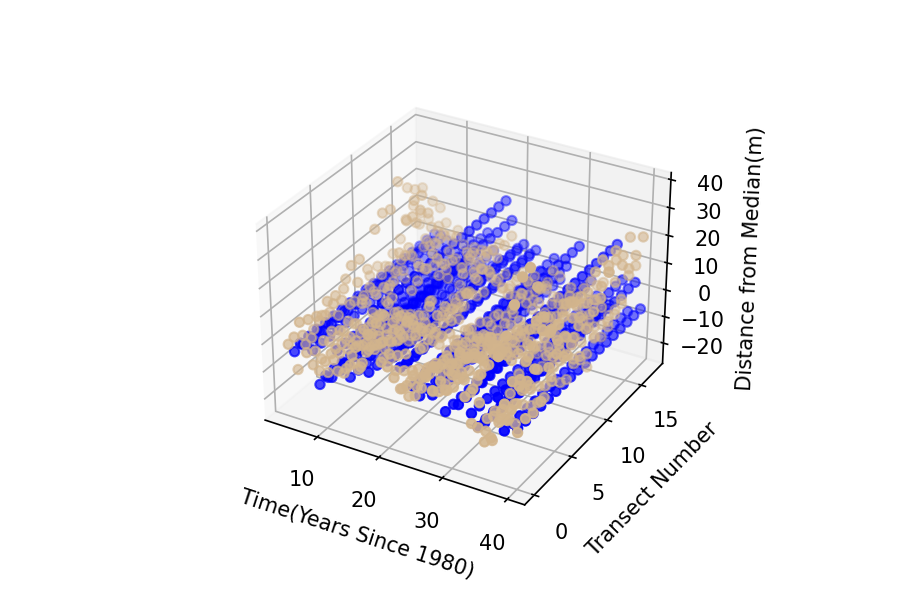

In [10]:
#Add a 3D Scatterplot
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(time,transect,distance, color = 'tan')
ax.scatter(time,transect,scaled_wave_power, color = 'blue')
ax.set_xlabel('Time(Years Since 1980)')
ax.set_ylabel('Transect Number')
ax.set_zlabel('Distance from Median(m)')

Text(0.5, 0, 'Variance For Uniform Scalar')

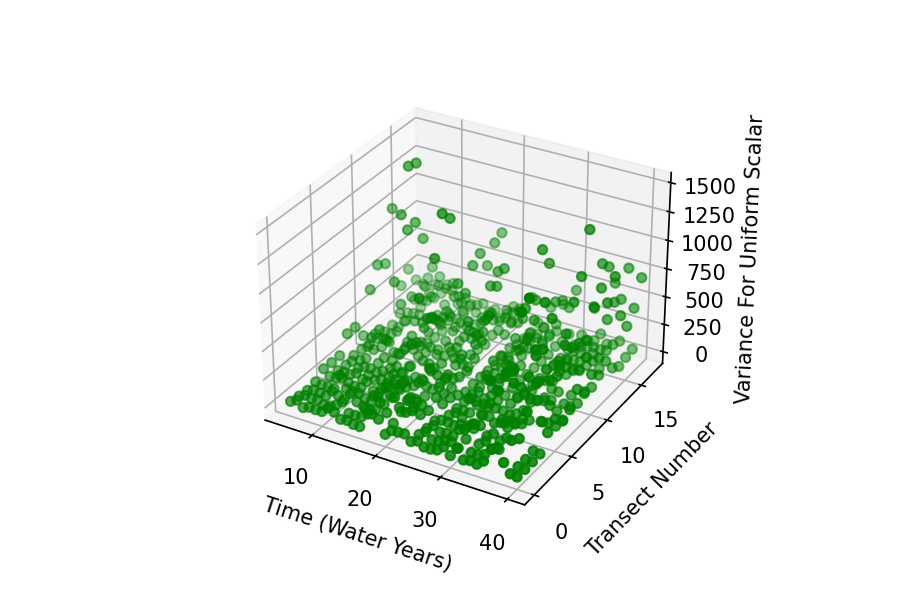

In [42]:
#Compute Variance Between Transect Distance and Water Power
variance = pd.Series(dtype = 'float64')
variance = (scaled_wave_power-distance)**2
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(time,transect,variance, color = 'green')
ax.set_xlabel('Time (Water Years Since 1980)')
ax.set_ylabel('Transect Number')
ax.set_zlabel('Variance For Uniform Scalar')

In [43]:
#Find Average Variance
variance_sum = variance.sum()
average_variance = variance_sum/len(variance)
print('average variance: '+ str(round(average_variance,0)))

average variance: 135.0


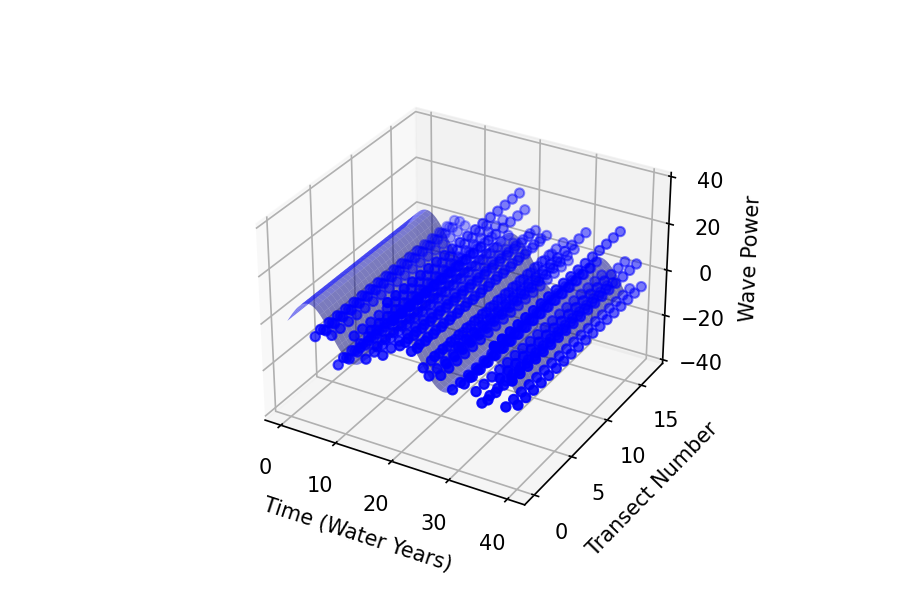

In [37]:
#approximating wave power with a surfaces
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(0,40, 0.25)
Y = np.arange(0, 15, 0.25)
X, Y = np.meshgrid(X, Y)
Z = 10*np.sin(X/2.5)

#source = https://matplotlib.org/stable/gallery/mplot3d/surface3d.html 

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, color = 'blue', alpha =0.5)

# Customize the z axis.
ax.set_zlim(-40,40)

#Graph Wave Power Data
ax.scatter(time,transect,scaled_wave_power, color = 'blue')


ax.set_xlabel('Time (Water Years Since 1980)')
ax.set_ylabel('Transect Number')
ax.set_zlabel('Wave Power')

plt.show()

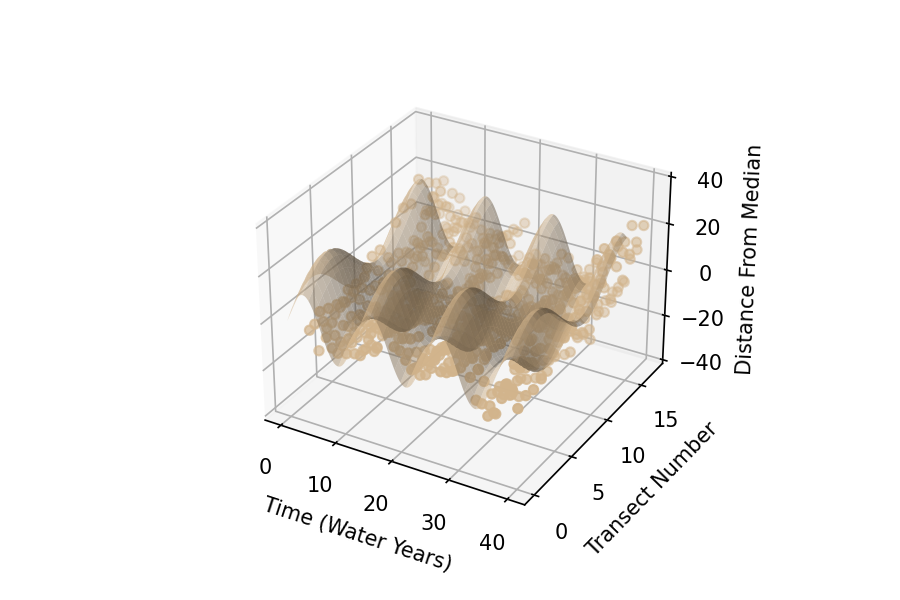

In [44]:
#viewing the two surfaces together
#approximating transect distance with a surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(0,40, 0.25)
Y = np.arange(0, 15, 0.25)
X, Y = np.meshgrid(X, Y)
Z = 13*np.sin(X/1.9)+10*np.sin(Y/1.9)

surf = ax.plot_surface(X, Y, Z, color = 'tan', alpha = 0.5)



# Customize the z axis.
ax.set_zlim(-40,40)

#Graph Wave Power Data
ax.scatter(time,transect,distance, color = 'tan')


ax.set_xlabel('Time (Water Years Since 1980)')
ax.set_ylabel('Transect Number')
ax.set_zlabel('Distance From Median')

plt.show()


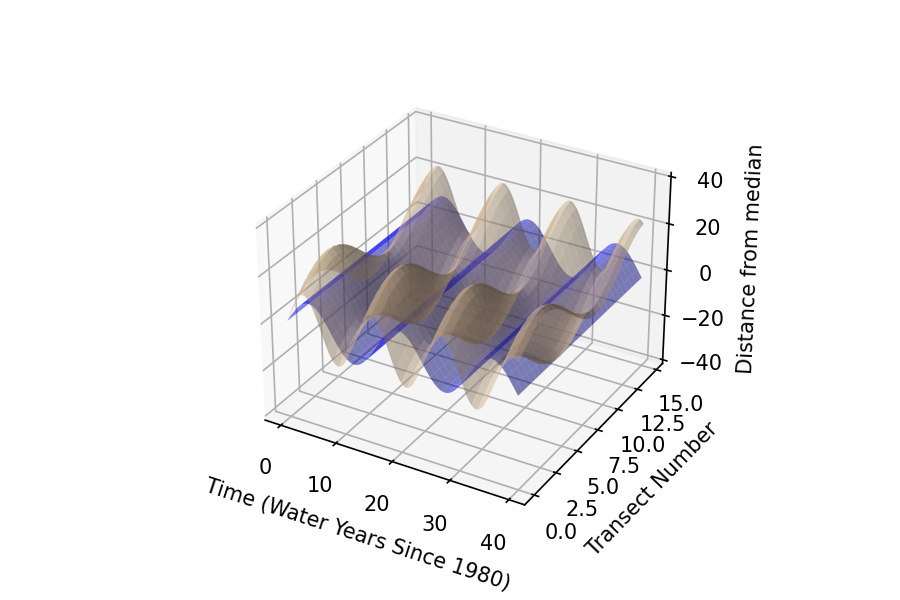

In [59]:
#approximating transect distance with a surface (predicts NaN values and fixes holes in the data)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(0,40, 0.25)
Y = np.arange(0, 15, 0.25)
X, Y = np.meshgrid(X, Y)
Z = 13*np.sin(X/1.9)+10*np.sin(Y/1.9)

#source = https://matplotlib.org/stable/gallery/mplot3d/surface3d.html 

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, color = 'tan', alpha = 0.5)

# Make data.
X = np.arange(0,40, 0.25)
Y = np.arange(0, 15, 0.25)
X, Y = np.meshgrid(X, Y)
Z = 10*np.sin(X/2.5)

#source = https://matplotlib.org/stable/gallery/mplot3d/surface3d.html 

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, color = 'blue', alpha =0.5)

# Customize the z axis.
ax.set_zlim(-40,40)


# Customize the z axis.
ax.set_zlim(-40,40)


ax.set_xlabel('Time (Water Years Since 1980)')
ax.set_ylabel('Transect Number')
ax.set_zlabel('Distance from median')

plt.show()

In [58]:
i = 0
j=0
while i<len(df['WY']):
    while j<len(df.columns):
        water_power_val = 10*np.sin(i/2.5)
        transect_distance_val = 13*np.sin(i/1.9)+10*np.sin(j/1.9)
        j=j+1
    j=0
    i = i+1


0.0
0.0
0.0
5.0235115460351265
0.0
8.687296180358695
0.0
9.999667804441291
0.0
8.605403383742441
0.0
4.881892088664755
0.0
-0.16301361193955086
0.0
-5.163795995000288
0.0
-8.766880310355383
0.0
-9.997010372394822
0.0
-8.521223683683791
0.0
-4.738975258547856
0.0
0.3259839026803528
0.0
5.302708154682748
0.0
8.844134624088184
0.0
9.991696214519848
0.0
8.434779451109167
0.0
4.594799036122554
0.0
-0.48886756253636243
0.0
-5.440211108893699
3.8941834230865053
6.530565009845665
3.8941834230865053
11.55407655588079
3.8941834230865053
15.21786119020436
3.8941834230865053
16.530232814286954
3.8941834230865053
15.135968393588106
3.8941834230865053
11.41245709851042
3.8941834230865053
6.367551397906114
3.8941834230865053
1.366769014845377
3.8941834230865053
-2.236315300509718
3.8941834230865053
-3.466445362549157
3.8941834230865053
-1.9906586738381264
3.8941834230865053
1.791589751297809
3.8941834230865053
6.8565489125260175
3.8941834230865053
11.833273164528414
3.8941834230865053
15.374699633933